# Capstone 3 | Life Expectancy Analysis

## Introduction
There are many factors that affects our life expectancy. From how we live our lives to where we are born determines how long we live. Death could come suddenly due to accidents or natural causes like earthquake, flood and fire. Many times these deaths are hard to prevent. But there are many other causes of death that are preventable. We will look into hypothesis that corresponds to life expectancy around the world. Following are the questions that we will ask.

Question 1: Is there a correlation between schooling, income composition of resources and life expectancy?

Question 2: Is there a correlation between HIV/AIDS, Adult Mortality and life expectancy?

## The Dataset
This dataset on Life Expectancy is found on [kaggle](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who). It  was collected from World Health Organization and United Nation website by Deeksha Russell and Duan Wang. It contains data for 193 countries observed for 15 years from year 2000 to 2015. This dataset contains 2938 rows and 22 columns. The data types are integer, float, and object. 

https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who/download

## Preparing the Data

### Importing

First we will import all the necessary libraries, mount my Google Drive, and load the initial CSV file into a Pandas DataFrame.

In [ ]:
# To keep the page organized, do all imports here
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns 
sns.set()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
life_df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/Life Expectancy Data.csv')

### First Look

Lets take a look at the DataFrame. 

In [ ]:
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

As you can see there are 2938 rows of data but there are some null values as well. The data is composed of object, integer and float data types. It contains data on immunization, mortality, economic and social factors from 193 countries around the world. Below is a sample of the data.

In [ ]:
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


### Data Cleaning

As mentioned earlier, there are some null values in the data which has to be removed for this analysis purpose. 

But before we start the cleanup process, lets remove the columns that we don't need for this analysis.

In [ ]:
life_df.drop(columns = ['Year','infant deaths','Alcohol','percentage expenditure','Hepatitis B','Measles ','under-five deaths ', 'Polio','Total expenditure','Diphtheria ', ' BMI ','GDP','Population', ' thinness  1-19 years', ' thinness 5-9 years' ], inplace = True)

Now let's see the data we have. We will be using life expectancy, adult mortality, HIV/AIDS, Income composition of resources and schooling. We are keeping country and status for tracking purpose. 

In [ ]:
life_df.head()

,Country,Status,Life expectancy,Adult Mortality,HIV/AIDS,Income composition of resources,Schooling
0,Afghanistan,Developing,65.0,263.0,0.1,0.479,10.1
1,Afghanistan,Developing,59.9,271.0,0.1,0.476,10.0
2,Afghanistan,Developing,59.9,268.0,0.1,0.470,9.9
3,Afghanistan,Developing,59.5,272.0,0.1,0.463,9.8
4,Afghanistan,Developing,59.2,275.0,0.1,0.454,9.5


This data is much cleaner now. 

Lets look at how many null values we are dealing with.

In [ ]:
life_df.isnull().sum()

Country                              0
Status                               0
Life expectancy                     10
Adult Mortality                     10
 HIV/AIDS                            0
Income composition of resources    167
Schooling                          163
dtype: int64

It's important that we do not have any null values in our sample data. Therefore, before starting the analysis we have to remove those null values.

In [ ]:
print("The starting size of life_df is {}".format(len(life_df)))

clean_life_df = life_df.dropna()

print("The size of the cleaned dataframe is {}".format(len(clean_life_df)))

The starting size of life_df is 2938
The size of the cleaned dataframe is 2768


After removing the null values we have total of 2768 rows of data. Now let look at the statistical infomation of these columns.

In [ ]:
clean_life_df.describe()

,Life expectancy,Adult Mortality,HIV/AIDS,Income composition of resources,Schooling
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,69.349566,163.041546,1.760766,0.627419,11.999639
std,9.360784,122.954439,5.187842,0.210978,3.346440
min,36.300000,1.000000,0.100000,0.000000,0.000000
25%,63.500000,73.000000,0.100000,0.493000,10.100000
50%,72.200000,143.500000,0.100000,0.677000,12.300000
75%,75.500000,225.000000,0.700000,0.779250,14.300000
max,89.000000,723.000000,50.600000,0.948000,20.700000


## Research Questions and Hypothesis

### Hypothesis #1
**Question:** Is there a correlation between schooling, income composition of resources and life expectancy? 


**Ho:** There is no linear correlation between schooling, income composition of resources and life expectancy

**Ha:** There is a linear correlation between schooling, income composition of resources and life expectancy



First, lets look at the data we want to analyze and run pearson r test. This sample size has total of 2768 which meets the requirement.

In [ ]:
clean_life_df[['Schooling', 'Income composition of resources', 'Life expectancy ']].describe()

,Schooling,Income composition of resources,Life expectancy
count,2768.000000,2768.000000,2768.000000
mean,11.999639,0.627419,69.349566
std,3.346440,0.210978,9.360784
min,0.000000,0.000000,36.300000
25%,10.100000,0.493000,63.500000
50%,12.300000,0.677000,72.200000
75%,14.300000,0.779250,75.500000
max,20.700000,0.948000,89.000000


**1.  Now lets run pearson r test to check for a positive or negative linear correlation between schooling and income composition of resources.**

In [ ]:
stats.pearsonr(clean_life_df["Schooling"], clean_life_df["Income composition of resources"])

(0.800046279299848, 0.0)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between schooling and income composition of resources.

The Pearson correlation coefficient of 0.80 indicates there is a strong positive linear correlation between schooling and income composition of resources.

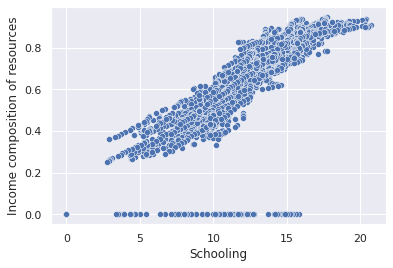

In [ ]:
sns.scatterplot(x="Schooling", y="Income composition of resources", data=clean_life_df)

This scatter plot also shows a strong positive correlation which suggests that the number of years people spend in school is heavely correlated with  the income.

**2. Now lets run pearson r test to check for a positive or negative linear correlation between schooling and life expectancy.**

In [ ]:
stats.pearsonr(clean_life_df["Schooling"], clean_life_df["Life expectancy "])

(0.7519754627366977, 0.0)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between schooling and life expectancy.

The Pearson correlation coefficient of 0.75 indicates there is a strong positive linear correlation between schooling and life expectancy.

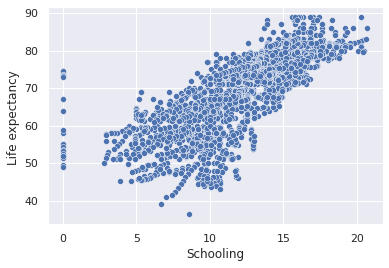

In [ ]:
sns.scatterplot(x="Schooling", y="Life expectancy ", data=clean_life_df)

This scatter plot shows a positive and strong correlation which suggests that the number of years people spend in school can increase life expectancy.

**3. Now lets run pearson r test to check for a positive or negative linear correlation between income composition of resources and life expectancy.**

In [ ]:
stats.pearsonr(clean_life_df["Income composition of resources"], clean_life_df["Life expectancy "])

(0.7247759785960612, 0.0)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between income composition of resources and life expectancy.

The Pearson correlation coefficient of 0.72 indicates there is a strong positive linear correlation between income composition of resources and life expectancy.

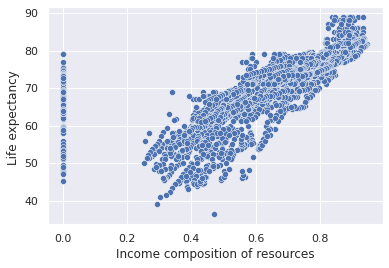

In [ ]:
sns.scatterplot(x="Income composition of resources", y="Life expectancy ", data=clean_life_df)

This scatter plot shows positive correlation between life expectancy and income composition of resources.

**Conclusion**

All scenarios have a positive correlation with schooling. This means that schooling increases life expectancy and income composition of resources.



### Hypothesis #2
**Question:** Is there a correlation between HIV/AIDS, adult mortality and life expectancy?

**Ho:** There is no linear correlation between HIV/AIDS and adult mortality and life expectancy.

**Ha:** There is a linear correlation between HIV/AIDS and adult mortality and life expectancy.

First, lets look at the data we want to analyze and run pearson r test. This sample size has total of 2768 rows which meets the requirement.

In [ ]:
clean_life_df[['Life expectancy ','Adult Mortality', ' HIV/AIDS']].describe()

,Life expectancy,Adult Mortality,HIV/AIDS
count,2768.000000,2768.000000,2768.000000
mean,69.349566,163.041546,1.760766
std,9.360784,122.954439,5.187842
min,36.300000,1.000000,0.100000
25%,63.500000,73.000000,0.100000
50%,72.200000,143.500000,0.100000
75%,75.500000,225.000000,0.700000
max,89.000000,723.000000,50.600000


**1. Lets check if we have a linear correlation between HIV/AIDS and life expectancy**

In [ ]:
stats.pearsonr(clean_life_df[' HIV/AIDS'], clean_life_df['Life expectancy '])

(-0.5631749807367374, 1.9398925412830506e-231)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between HIV/AIDS and life expectancy.

The Pearson correlation coefficient of -0.56 indicates there is a moderate negative linear correlation between HIV/AIDS and life expectancy.

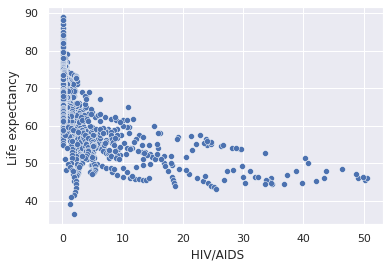

In [ ]:
sns.scatterplot(x= ' HIV/AIDS', y='Life expectancy ', data=clean_life_df)

This scatter plot also shows moderate negative correlation between HIV/AIDS and life expectancy.

**2. Lets check if we have a correlation between adult mortality and life expectancy**

In [ ]:
stats.pearsonr(clean_life_df['Adult Mortality'], clean_life_df['Life expectancy '])

(-0.6845845786030256, 0.0)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between adult mortality and life expectancy.

The Pearson correlation coefficient of -0.68 indicates there is a moderate negative linear correlation between adult mortality and life expectancy.

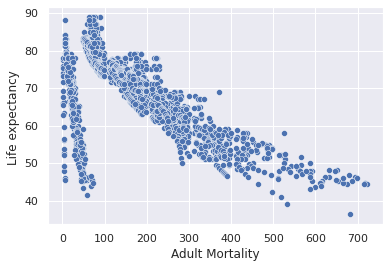

In [ ]:
sns.scatterplot(x='Adult Mortality', y='Life expectancy ', data=clean_life_df)

This scatter plot also suggests moderate negative linear correlation between adult mortality and life expectancy. 

**3. Lets check if we have a correlation between adult mortality and HIV/AIDS.**

In [ ]:
stats.pearsonr(clean_life_df['Adult Mortality'], clean_life_df[' HIV/AIDS'])

(0.5293299776048797, 9.74945726551432e-200)

The p-value of 0.0 is < our alpha of 0.05, thus we reject the null hypothesis that there is no linear correlation between adult mortality and HIV/AIDS.

The Pearson correlation coefficient of 0.52 indicates there is a moderate positive linear correlation between adult mortality and HIV/AIDS.

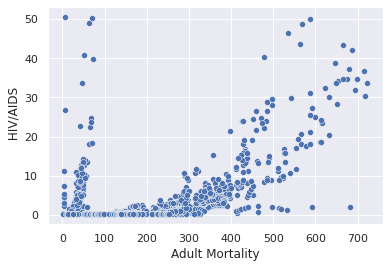

In [ ]:
sns.scatterplot(x='Adult Mortality', y=' HIV/AIDS', data=clean_life_df)

This scatter plot also suggests a moderate positive linear correlation between adult mortality and HIV/AIDS. 

**Conclusion** 

Since both scenarios have a negative correlation with life expectancy this means that life expectancy will decrease if the number of adult mortality and HIV/AIDS increases.

## Insights & Recommendations
In the first hypothesis I was confident that there is a strong correlation between schooling, income composition and life expectancy. This test strongly suggests that with higher rate of schooling, there will be higher income and higher life expectancy. Therefore, focusing on education is very important for all countries to increase life expectancy.  
In the second hypothesis I was expecting HIV/AIDS and adult mortality to have a positive correlation to life expectancy.  But adult mortality has a stronger negative correlation with HIV/AIDS. This means that when HIV/AIDS death rate and adult mortality rate increases then more likely life expectancy will decrease. 
Therefore, looking into causes of adult mortality is very important. HIV/AIDS could be one factor and lack of education could be another. But for now this analysis concludes that schooling and focusing on adult mortality could prevent life expectancy from going down.


